In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('ticks')

In [2]:
session=pd.read_csv('sessions.csv')
user=pd.read_csv('train_users_2.csv')

In [3]:
session.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [4]:
df=pd.merge(session,user[['id','country_destination']],left_on='user_id',right_on='id',how='right')

In [5]:
df=df[~df['user_id'].isna()]

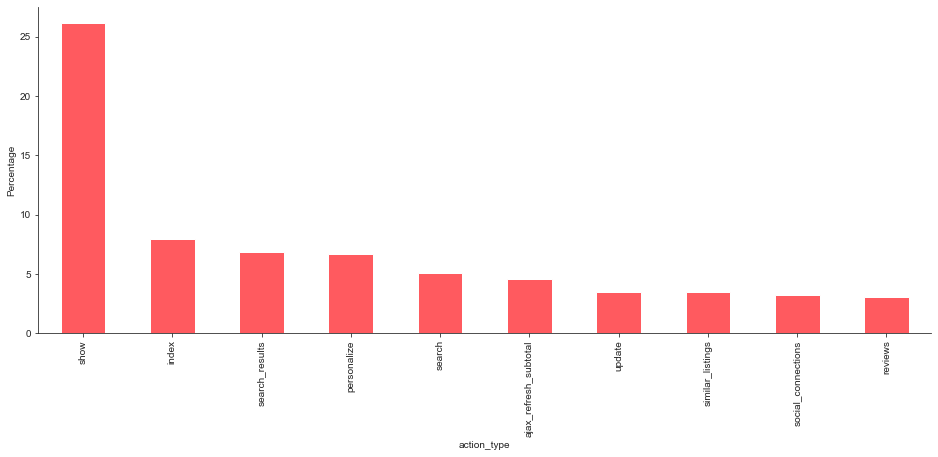

In [6]:
sns.set_style('ticks')
plt.figure(figsize=(16,6))
action_type_percentage = session['action'].value_counts().head(10) / session.shape[0] * 100
action_type_percentage.plot(kind='bar',color='#ff5a5f')
plt.xlabel('action_type')
plt.ylabel('Percentage')
sns.despine()

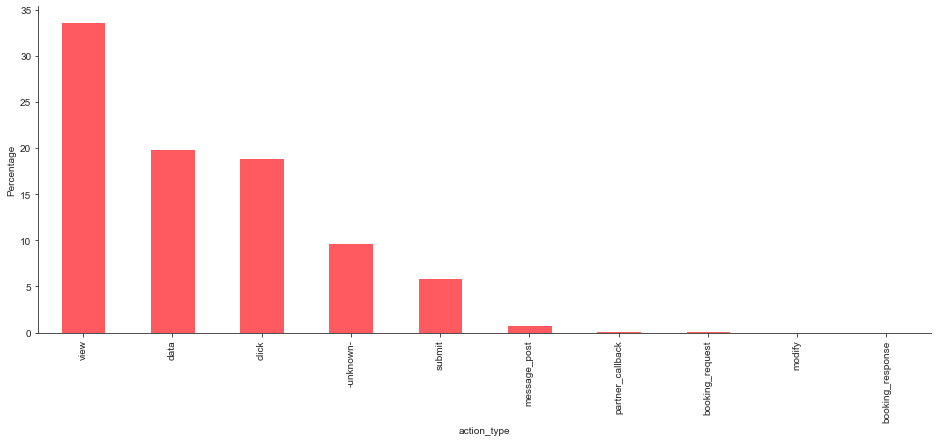

In [7]:
sns.set_style('ticks')
plt.figure(figsize=(16,6))
action_type_percentage = session['action_type'].value_counts().head(10) / session.shape[0] * 100
action_type_percentage.plot(kind='bar',color='#ff5a5f')
plt.xlabel('action_type')
plt.ylabel('Percentage')
sns.despine()

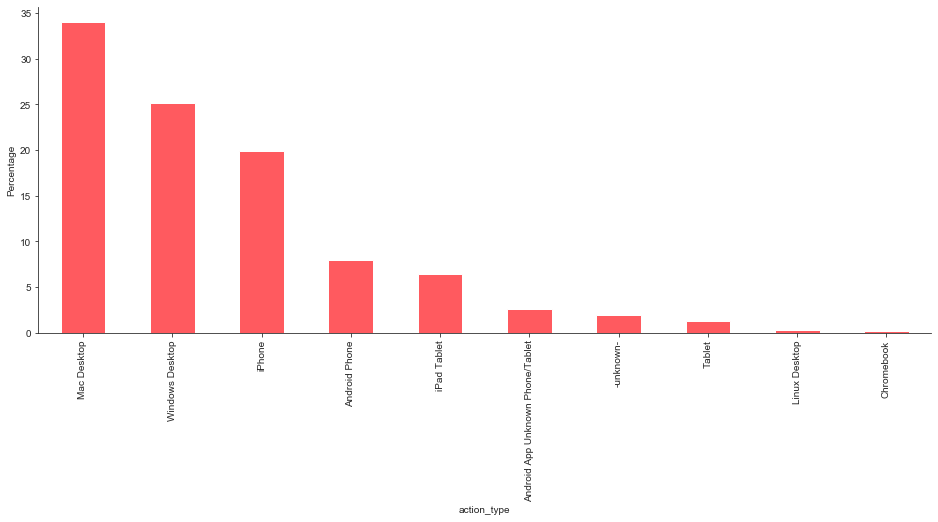

In [8]:
sns.set_style('ticks')
plt.figure(figsize=(16,6))
action_type_percentage = session['device_type'].value_counts().head(10) / session.shape[0] * 100
action_type_percentage.plot(kind='bar',color='#ff5a5f')
plt.xlabel('action_type')
plt.ylabel('Percentage')
sns.despine()

In [9]:
session.rename(columns={'user_id': 'id'}, inplace=True)
action_count = session.groupby(['id', 'action'])['secs_elapsed'].agg(len).unstack()
action_type_count = session.groupby(['id', 'action_type'])['secs_elapsed'].agg(len).unstack()
action_detail_count = session.groupby(['id', 'action_detail'])['secs_elapsed'].agg(len).unstack()
device_type_sum = session.groupby(['id', 'device_type'])['secs_elapsed'].agg(sum).unstack()

In [10]:
sessions_data = pd.concat([action_count, action_type_count, action_detail_count, device_type_sum],axis=1)
sessions_data.columns = sessions_data.columns.map(lambda x: str(x) + '_count')
sessions_data['most_used_device'] = session.groupby('id')['device_type'].max()

C:\Users\Asyariati\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [11]:
sessions_data.head()

,10_count,11_count,12_count,15_count,about_us_count,accept_decline_count,account_count,acculynk_bin_check_failed_count,acculynk_bin_check_success_count,acculynk_load_pin_pad_count,...,Linux Desktop_count,Mac Desktop_count,Opera Phone_count,Tablet_count,Windows Desktop_count,Windows Phone_count,iPad Tablet_count,iPhone_count,iPodtouch_count,most_used_device
00023iyk9l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,295642.0,NaN,NaN,NaN,NaN,NaN,572254.0,NaN,iPhone
0010k6l0om,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,586543.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mac Desktop
001wyh0pz8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android App Unknown Phone/Tablet
0028jgx1x1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Android Phone
002qnbzfs5,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6283569.0,NaN,iPhone


In [12]:
sessions_data.index.names = ['id']
sessions_data.reset_index(inplace=True)

In [13]:
secs_elapsed=session.groupby('id')['secs_elapsed']

In [14]:
secs_elapsed=secs_elapsed.agg({'secs_elapsed_sum': np.sum,
                               'secs_elapsed_mean': np.mean,
                               'secs_elapsed_min': np.min,
                               'secs_elapsed_max': np.max,
                               'secs_elapsed_median': np.median,
                               'secs_elapsed_std': np.std,
                               'secs_elapsed_var': np.var,
                               'day_pauses': lambda x: (x > 86400).sum(),
                               'long_pauses': lambda x: (x > 300000).sum(),
                               'short_pauses': lambda x: (x < 3600).sum(),
                               'session_length' : np.count_nonzero})

C:\Users\Asyariati\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # This is added back by InteractiveShellApp.init_path()


In [15]:
secs_elapsed.reset_index(inplace=True)

In [16]:
sessions_secs_elapsed = pd.merge(sessions_data, secs_elapsed, on='id', how='left')

In [17]:
sessions_secs_elapsed.head()

,id,10_count,11_count,12_count,15_count,about_us_count,accept_decline_count,account_count,acculynk_bin_check_failed_count,acculynk_bin_check_success_count,...,secs_elapsed_mean,secs_elapsed_min,secs_elapsed_max,secs_elapsed_median,secs_elapsed_std,secs_elapsed_var,day_pauses,long_pauses,short_pauses,session_length
0,00023iyk9l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22253.743590,0.0,567165.0,850.0,92242.561900,8.508690e+09,2.0,1.0,29.0,39.0
1,0010k6l0om,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9460.370968,3.0,127898.0,948.5,22751.227918,5.176184e+08,2.0,0.0,46.0,63.0
2,001wyh0pz8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3179.382022,35.0,50548.0,1105.0,6569.648182,4.316028e+07,0.0,0.0,71.0,90.0
3,0028jgx1x1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9900.333333,3.0,84636.0,1614.0,18004.964337,3.241787e+08,0.0,0.0,17.0,31.0
4,002qnbzfs5,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8232.335025,0.0,1418284.0,498.0,58110.646170,3.376847e+09,13.0,3.0,602.0,787.0


In [18]:
train_users = pd.read_csv('train_users_2.csv')
test_users = pd.read_csv('test_users.csv')
df = pd.concat((train_users, test_users), axis=0, ignore_index=True)
df.drop('date_first_booking', axis=1, inplace=True)

C:\Users\Asyariati\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
df['date_account_created'] = pd.to_datetime(df['date_account_created'])
df['timestamp_first_active'] = pd.to_datetime((df['timestamp_first_active'] // 1000000), format='%Y%m%d')
df['weekday_account_created'] = df['date_account_created'].dt.weekday
df['day_account_created'] = df['date_account_created'].dt.day
df['month_account_created'] = df['date_account_created'].dt.month
df['year_account_created'] = df['date_account_created'].dt.year
df['weekday_first_active'] = df['timestamp_first_active'].dt.weekday
df['day_first_active'] = df['timestamp_first_active'].dt.day
df['month_first_active'] = df['timestamp_first_active'].dt.month
df['year_first_active'] = df['timestamp_first_active'].dt.year
df['time_lag'] = (df['date_account_created'] - df['timestamp_first_active']).apply(lambda x: x.days)

cols_to_drop = ['date_account_created', 'timestamp_first_active']
df.drop(cols_to_drop, axis=1, inplace=True)

In [20]:
age = df['age'].values
df['age'] = np.where(np.logical_and(age>1919, age<2001), 2019-age, age)
df['age'][(df['age']>85) | (df['age']<18)]=np.NaN

fill_nan=np.random.randint(df['age'].mean()-df['age'].std(),df['age'].mean()+df['age'].std(),df['age'].isna().sum())
df['age'][df['age'].isna()]=fill_nan
df['age']=df['age'].astype(int)

C:\Users\Asyariati\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
C:\Users\Asyariati\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
C:\Users\Asyariati\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Asyariati\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
df=pd.merge(df, sessions_secs_elapsed, on='id', how = 'left')

In [22]:
categorical_features = ['gender', 'signup_method', 'signup_flow', 'language','affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'most_used_device', 'weekday_account_created', 'weekday_first_active']
df = pd.get_dummies(df, columns=categorical_features,drop_first=True)

In [23]:
sessions_secs_elapsed.head()

,id,10_count,11_count,12_count,15_count,about_us_count,accept_decline_count,account_count,acculynk_bin_check_failed_count,acculynk_bin_check_success_count,...,secs_elapsed_mean,secs_elapsed_min,secs_elapsed_max,secs_elapsed_median,secs_elapsed_std,secs_elapsed_var,day_pauses,long_pauses,short_pauses,session_length
0,00023iyk9l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22253.743590,0.0,567165.0,850.0,92242.561900,8.508690e+09,2.0,1.0,29.0,39.0
1,0010k6l0om,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9460.370968,3.0,127898.0,948.5,22751.227918,5.176184e+08,2.0,0.0,46.0,63.0
2,001wyh0pz8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3179.382022,35.0,50548.0,1105.0,6569.648182,4.316028e+07,0.0,0.0,71.0,90.0
3,0028jgx1x1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9900.333333,3.0,84636.0,1614.0,18004.964337,3.241787e+08,0.0,0.0,17.0,31.0
4,002qnbzfs5,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8232.335025,0.0,1418284.0,498.0,58110.646170,3.376847e+09,13.0,3.0,602.0,787.0


In [24]:
df.set_index('id', inplace=True)

In [25]:
train=df.loc[train_users['id']]

In [26]:
train.reset_index(inplace=True)
train.fillna(0, inplace=True)

In [27]:
from sklearn.preprocessing import LabelEncoder

y = train['country_destination']
X = train.drop(['country_destination', 'id'],axis=1).values

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc=StandardScaler()
X_scaled=sc.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, encoded_y, test_size=0.2, random_state=42)

#### RF

In [32]:
def ndcg_score(pred_prob, y_test):
    top = []

    for i in range(pred_prob.shape[0]):
        top.append(np.argsort(pred_prob[i])[::-1][:5])

    mat = np.reshape(np.repeat(y_test,np.shape(top)[1]) == np.array(top).ravel(),np.array(top).shape).astype(int)
    score = np.mean(np.sum(mat/np.log2(np.arange(2, mat.shape[1] + 2)),axis = 1))
    return score

def calc_ndcg_test(X_test,y_test,model):
    preds=model.predict(X_test)
    predictProba=model.predict_proba(X_test)
    score_ndcg=ndcg_score(predictProba,y_test)
    return {'ndcg':score_ndcg}

def calc_ndcg_train(X_train,y_train,model):
    preds=model.predict(X_train)
    predictProba=model.predict_proba(X_train)
    score_ndcg=ndcg_score(predictProba,y_train)
    return {'ndcg':score_ndcg}

def calc_metrics(X_train, y_train, X_test,y_test,model):
    model.fit(X_train,y_train)
    train_error=calc_ndcg_train(X_train,y_train,model)
    validation_error=calc_ndcg_test(X_test,y_test,model)
    return train_error,validation_error

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
pred_prob=rfc.predict_proba(X_test)
pred=rfc.predict(X_test)

C:\Users\Asyariati\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
ndcg_score(pred_prob,y_test)

0.7813011468314958

In [35]:
feat_importance_rfc=pd.DataFrame(rfc.feature_importances_,index=train.drop(['country_destination', 'id'],axis=1).columns,columns=['coef'])

In [36]:
feat_importance_rfc.sort_values('coef',ascending=False).head(10)

,coef
age,0.167742
day_account_created,0.076049
day_first_active,0.076007
month_first_active,0.051389
month_account_created,0.051113
gender_FEMALE,0.020965
gender_MALE,0.019175
signup_method_facebook,0.016840
first_affiliate_tracked_untracked,0.013812
year_account_created,0.013803


#### Logistic Mult

In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(n_jobs=-1)
log.fit(X_train, y_train)
pred_prob=log.predict_proba(X_test)
pred=log.predict(X_test)

C:\Users\Asyariati\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asyariati\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Asyariati\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


In [ ]:
ndcg_score(pred_prob,y_test)

In [ ]:
feat_importance_log=pd.DataFrame(log.feature_importances_,index=train.drop(['country_destination', 'id'],axis=1).columns,columns=['coef'])

In [ ]:
feat_importance_log.sort_values('coef',ascending=False).head(10)

In [182]:
from sklearn.model_selection import KFold
k=5
kf=KFold(n_splits=k,shuffle=True,random_state=42)

In [183]:
train_errors=[]
validation_errors=[]
for train_index,val_index in kf.split(X,encoded_y):
    
    x_train,x_val=X[train_index],X[val_index]
    y_train,y_val=encoded_y[train_index],encoded_y[val_index]
    
    train_error,val_error=calc_metrics(x_train,y_train,x_val,y_val,rfc)
    
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [184]:
iterasi=[]
for i,j in zip(train_errors,validation_errors):
    iterasi.append([i['ndcg'],j['ndcg']])

index=['Iterasi {}'.format(i) for i in range(1,k+1,1)]
col=['train_ndcg','val_ndcg']

calc_matrix=pd.DataFrame(iterasi,index=index,columns=col)

average=[]
for i in calc_matrix.columns:
    average.append(calc_matrix[i].mean())

std=[]
for i in calc_matrix.columns:
    std.append(calc_matrix[i].std())

calc_matrix.loc['Average']=average
calc_matrix.loc['Deviation']=std
calc_matrix

,train_ndcg,val_ndcg
Iterasi 1,0.990266,0.780885
Iterasi 2,0.990430,0.780824
Iterasi 3,0.990264,0.778529
Iterasi 4,0.990604,0.780637
Iterasi 5,0.990004,0.781565
Average,0.990314,0.780488
Deviation,0.000222,0.001150


In [185]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer


def dcg_score(y_true, y_score, k=5):
    """Discounted cumulative gain (DCG) at rank K.

    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (true relevance labels).
    y_score : array, shape = [n_samples, n_classes]
        Predicted scores.
    k : int
        Rank.

    Returns
    -------
    score : float
    """
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)


def ndcg_score_1(ground_truth, predictions, k=5):
    """Normalized discounted cumulative gain (NDCG) at rank K.

    Normalized Discounted Cumulative Gain (NDCG) measures the performance of a
    recommendation system based on the graded relevance of the recommended
    entities. It varies from 0.0 to 1.0, with 1.0 representing the ideal
    ranking of the entities.

    Parameters
    ----------
    ground_truth : array, shape = [n_samples]
        Ground truth (true labels represended as integers).
    predictions : array, shape = [n_samples, n_classes]
        Predicted probabilities.
    k : int
        Rank.

    Returns
    -------
    score : float

    Example
    -------
    >>> ground_truth = [1, 0, 2]
    >>> predictions = [[0.15, 0.55, 0.2], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    1.0
    >>> predictions = [[0.9, 0.5, 0.8], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    0.6666666666
    """
    lb = LabelBinarizer()
    lb.fit(range(predictions.shape[1]+ 1))
    T = lb.transform(ground_truth)


    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)

def calc_ndcg_test_1(X_test,y_test,model):
    preds=model.predict(X_test)
    y_conv = y_test.tolist() 
    y_pred_prob=model.predict_proba(X_test)
    score_ndcg=ndcg_score_1(y_conv,y_pred_prob)
    return {'ndcg':score_ndcg}

def calc_ndcg_train_1(X_train,y_train,model):
    preds=model.predict(X_train)
    y_conv = y_train.tolist() 
    y_pred_prob=model.predict_proba(X_train)
    score_ndcg=ndcg_score_1(y_conv,y_pred_prob)
    return {'ndcg':score_ndcg}

def calc_metrics_1(X_train, y_train, X_test,y_test,model):
    model.fit(X_train,y_train)
    train_error=calc_ndcg_train_1(X_train,y_train,model)
    validation_error=calc_ndcg_test_1(X_test,y_test,model)
    return train_error,validation_error

In [186]:
model_perf={}
y_conv = y_test.tolist() 
y_pred_prob_rfc=rfc.predict_proba(X_test)
print('nDCG:' + str(ndcg_score_1(y_conv,y_pred_prob_rfc)))
model_perf['rfc','nDCG'] = ndcg_score_1(y_conv,y_pred_prob_rfc)
#pd.DataFrame(y_pred_prob,columns=clf.classes_)

nDCG:0.7353990205250198


In [187]:
train_errors=[]
validation_errors=[]
for train_index,val_index in kf.split(X,encoded_y):
    
    x_train,x_val=X[train_index],X[val_index]
    y_train,y_val=encoded_y[train_index],encoded_y[val_index]
    
    train_error,val_error=calc_metrics_1(x_train,y_train,x_val,y_val,rfc)
    
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [188]:
iterasi=[]
for i,j in zip(train_errors,validation_errors):
    iterasi.append([i['ndcg'],j['ndcg']])

index=['Iterasi {}'.format(i) for i in range(1,k+1,1)]
col=['train_ndcg','val_ndcg']

calc_matrix=pd.DataFrame(iterasi,index=index,columns=col)

average=[]
for i in calc_matrix.columns:
    average.append(calc_matrix[i].mean())

std=[]
for i in calc_matrix.columns:
    std.append(calc_matrix[i].std())

calc_matrix.loc['Average']=average
calc_matrix.loc['Deviation']=std
calc_matrix

,train_ndcg,val_ndcg
Iterasi 1,0.990041,0.779000
Iterasi 2,0.990274,0.780114
Iterasi 3,0.990054,0.780274
Iterasi 4,0.990021,0.779926
Iterasi 5,0.990078,0.781693
Average,0.990094,0.780201
Deviation,0.000103,0.000969


#### XGBoost

In [125]:
import xgboost as xgb

xgtrain = xgb.DMatrix(X, label=encoded_y)

In [126]:
param = {'max_depth': 10,
         'learning_rate': 1,
         'n_estimators': 5,
         'objective': 'multi:softprob',
         'num_class': 12,
         'gamma': 0,
         'min_child_weight': 1,
         'max_delta_step': 0,
         'subsample': 1,
         'colsample_bytree': 1,
         'colsample_bylevel': 1,
         'reg_alpha': 0,
         'reg_lambda': 1,
         'scale_pos_weight': 1,
         'base_score': 0.5,
         'missing': None,
         'silent': True,
         'nthread': 4,
         'seed': 42}

# Do cross validation
num_round = 5
xgb.cv(param, xgtrain, num_boost_round=num_round, metrics=['mlogloss'], feval=ndcg_score)

C:\Users\Asyariati\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  import sys


ValueError: cannot reshape array of size 1 into shape (142300,5)